# Kütüphanelerin İmport Edilmesi

In [4]:
#!pip install pycaret

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from pycaret.regression import *
import catboost as cb


## Gerekli Pandas Ayarları

In [6]:
pd.options.display.max_columns=200
pd.options.display.max_rows=200
pd.options.display.max_info_columns=200

# Veri Setinin Yüklenmesi ve Veriyi Düzenleme

In [7]:
df=pd.read_csv("/kaggle/input/airbnb/sf_airbnb listings.csv")
df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,2.019060e+13,6/2/19,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,NaN,NaN,https://a0.muscache.com/im/pictures/b7c2a199-4...,NaN,1169,https://www.airbnb.com/users/show/1169,Holly,7/31/08,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/pictures/efdad96a-3...,https://a0.muscache.com/im/pictures/efdad96a-3...,Duboce Triangle,1,1,"[''''email'''', ''''phone'''', ''''facebook'''...",t,t,"San Francisco, CA, United States",Lower Haight,Western Addition,NaN,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Kitchen,Pets live o...",NaN,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,2 months ago,t,1,3,7,92,6/2/19,192,56,7/23/09,5/16/19,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,{SAN FRANCISCO},t,f,moderate,f,f,1,1,0,0,1.60
1,5858,https://www.airbnb.com/rooms/5858,2.019060e+13,6/2/19,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",NaN,NaN,https://a0.muscache.com/im/pictures/17714/3a7a...,NaN,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,3/2/09,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,within a day,100%,NaN,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache.com/im/users/8904/profile_..

In [8]:
df.shape

(7575, 106)

In [9]:
df.columns.unique()

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [10]:
df=df.drop(["id","listing_url","scrape_id","last_scraped","name","summary","space","description","experiences_offered","neighborhood_overview","notes","transit","access","interaction",
            "house_rules","thumbnail_url","medium_url","picture_url","xl_picture_url","host_id","host_url","host_name","host_since","host_location","host_about","host_response_time","host_response_rate",
            "host_acceptance_rate","host_is_superhost","host_thumbnail_url","host_picture_url","host_neighbourhood","host_verifications","street","neighbourhood","neighbourhood_cleansed","neighbourhood_group_cleansed",
            "city","state","zipcode","market","smart_location","country_code","country","amenities","square_feet","calendar_updated","calendar_last_scraped","first_review","last_review","license",
            "jurisdiction_names","cancellation_policy","weekly_price","monthly_price","host_has_profile_pic","host_total_listings_count","has_availability","is_business_travel_ready"],axis=1)

In [11]:
df

,host_listings_count,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1,t,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,$170.00,$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,1,3,7,92,192,56,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,t,f,f,1,1,0,0,1.60
1,2,t,37.74511,-122.42102,t,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,$235.00,NaN,$100.00,2,$0.00,30,60,30,30,60,60,30.0,60.0,0,0,0,0,111,0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,f,f,1,1,0,0,0.90
2,10,t,37.76669,-122.45250,t,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,$65.00,$200.00,$50.00,1,$12.00,32,60,32,32,60,60,32.0,60.0,30,60,90,365,17,0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,t,f,f,f,9,0,9,0,0.14
3,10,t,37.76487,-122.45183,t,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,$65.00,$200.00,$50.00,1,$12.00,32,90,32,32,90,90,32.0,90.0,11,41,71,346,8,1,93.0,9.0,9.0,10.0,10.0,9.0,9.0,t,f,f,f,9,0,9,0,0.14
4,2,t,37.77525,-122.43637,t,House,Entire home/apt,5,1.5,2.0,2.0,Real Bed,$685.00,$0.00,$225.00,2,$150.00,4,1125,4,4,1125,1125,4.0,1125.0,30,60,90,90,27,1,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,t,t,2,2,0,0,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7570,2,f,37.75227,-122.42785,f,Condominium,Entire home/apt,2,1.0,2.0,2.0,Real Bed,$475.00,NaN,NaN,1,$0.00,3,1125,3,4,1125,1125,3.2,1125.0,26,56,86,86,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,f,1,1,0,0,NaN
7571,92,f,37.75455,-122.42382,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,$115.00,$0.00,$95.00,1,$0.00,30,150,30,30,150,150,30.0,150.0,23,53,83,173,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,f,92,91,1,0,NaN
7572,2,t,37.75803,-122.42080,f,House,Entire home/apt,6,1.5,2.0,2.0,Real Bed,$500.00,$0.00,$75.00,4,$25.00,1,10,1,1,10,10,1.0,10.0,7,9,9,9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,f,f,2,1,1,0,NaN
7573,3,f,37.76089,-122.50258,t,House,Entire home/apt,6,1.0,2.0,3.0,Real Bed,$180.00,"$1,000.00",$150.00,4,$5.00,30,1125,30,30,1125,1125,30.0,1125.0,16,46,76,107,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,f,f,3,2,1,0,NaN


In [12]:
df.columns.unique()

Index(['host_listings_count', 'host_identity_verified', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'instant_bookable', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_list

In [13]:
df.isnull().sum()

host_listings_count                                0
host_identity_verified                             0
latitude                                           0
longitude                                          0
is_location_exact                                  0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                         18
bedrooms                                           2
beds                                               7
bed_type                                           0
price                                              0
security_deposit                                1543
cleaning_fee                                     835
guests_included                                    0
extra_people                                       0
minimum_nights                                     0
maximum_nights                                

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7575 entries, 0 to 7574
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_listings_count                           7575 non-null   int64  
 1   host_identity_verified                        7575 non-null   object 
 2   latitude                                      7575 non-null   float64
 3   longitude                                     7575 non-null   float64
 4   is_location_exact                             7575 non-null   object 
 5   property_type                                 7575 non-null   object 
 6   room_type                                     7575 non-null   object 
 7   accommodates                                  7575 non-null   int64  
 8   bathrooms                                     7557 non-null   float64
 9   bedrooms                                      7573 non-null   f

In [15]:
df.security_deposit.value_counts()

$0.00         1820
$500.00       1262
$200.00        410
$1,000.00      381
$100.00        356
$300.00        350
$250.00        276
$150.00        158
$400.00        153
$2,000.00      121
$2,500.00       85
$1,500.00       83
$350.00         72
$5,000.00       61
$600.00         57
$800.00         47
$3,000.00       36
$750.00         36
$700.00         29
$450.00         21
$3,500.00       21
$650.00         12
$900.00         11
$4,000.00        9
$1,200.00        8
$125.00          8
$95.00           8
$199.00          7
$120.00          7
$1,250.00        7
$950.00          6
$175.00          6
$180.00          5
$375.00          5
$550.00          5
$499.00          4
$299.00          4
$1,800.00        4
$1,700.00        3
$4,500.00        3
$130.00          2
$1,600.00        2
$2,600.00        2
$5,100.00        2
$3,300.00        2
$325.00          2
$1,300.00        2
$1,750.00        2
$2,700.00        2
$225.00          2
$1,900.00        2
$680.00          2
$1,400.00   

In [16]:
df["security_deposit"]=df["security_deposit"].fillna("0.00")
df["security_deposit"]=df["security_deposit"].str.strip("$").str.replace(",",".").str.strip(" ")
# security deposit değerlerindeki virgülleri ve dolar işaretini kaldırıp boşlukları silme işlemi.

In [17]:
security_deposit = []
for d in df["security_deposit"]:
    # Sıfırları ve ekstra noktaları kaldırma
    d = d.replace('.', '')
    d = d[:-2] + '.' + d[-2:]
    security_deposit.append(float(d))

df["security_deposit"]=security_deposit

df.security_deposit.value_counts()

0.0       3363
500.0     1262
200.0      410
1000.0     381
100.0      356
300.0      350
250.0      276
150.0      158
400.0      153
2000.0     121
2500.0      85
1500.0      83
350.0       72
5000.0      61
600.0       57
800.0       47
3000.0      36
750.0       36
700.0       29
450.0       21
3500.0      21
650.0       12
900.0       11
4000.0       9
1200.0       8
125.0        8
95.0         8
199.0        7
120.0        7
1250.0       7
950.0        6
175.0        6
180.0        5
375.0        5
550.0        5
499.0        4
299.0        4
1800.0       4
1700.0       3
4500.0       3
130.0        2
1600.0       2
2600.0       2
5100.0       2
3300.0       2
325.0        2
1300.0       2
1750.0       2
2700.0       2
225.0        2
1900.0       2
680.0        2
1400.0       2
270.0        2
290.0        2
275.0        2
4200.0       2
850.0        2
2200.0       1
990.0        1
110.0        1
165.0        1
2400.0       1
320.0        1
795.0        1
3200.0       1
399.0     

In [18]:
df.cleaning_fee.value_counts()

$100.00     654
$150.00     476
$50.00      416
$75.00      304
$0.00       288
$95.00      264
$200.00     263
$25.00      261
$125.00     253
$40.00      225
$60.00      204
$30.00      204
$250.00     193
$80.00      191
$120.00     144
$35.00      143
$240.00     122
$45.00      118
$20.00      106
$90.00      101
$70.00       92
$300.00      88
$65.00       85
$85.00       82
$99.00       80
$175.00      78
$15.00       58
$10.00       56
$101.00      54
$148.00      54
$160.00      52
$330.00      50
$55.00       46
$140.00      46
$29.00       45
$225.00      40
$110.00      38
$180.00      35
$280.00      33
$39.00       32
$244.00      27
$69.00       25
$130.00      24
$350.00      24
$79.00       22
$89.00       21
$185.00      20
$370.00      20
$500.00      20
$155.00      17
$49.00       15
$195.00      14
$135.00      14
$76.00       13
$59.00       13
$275.00      13
$115.00      12
$400.00      12
$145.00      12
$165.00      11
$149.00      10
$105.00       9
$88.00  

In [19]:
df["cleaning_fee"]=df["cleaning_fee"].str.strip("$").str.replace(",",".").astype(float)



df.cleaning_fee.value_counts()

100.0    654
150.0    476
50.0     416
75.0     304
0.0      288
95.0     264
200.0    263
25.0     261
125.0    253
40.0     225
60.0     204
30.0     204
250.0    193
80.0     191
120.0    144
35.0     143
240.0    122
45.0     118
20.0     106
90.0     101
70.0      92
300.0     88
65.0      85
85.0      82
99.0      80
175.0     78
15.0      58
10.0      56
101.0     54
148.0     54
160.0     52
330.0     50
55.0      46
140.0     46
29.0      45
225.0     40
110.0     38
180.0     35
280.0     33
39.0      32
244.0     27
69.0      25
130.0     24
350.0     24
79.0      22
89.0      21
185.0     20
370.0     20
500.0     20
155.0     17
49.0      15
195.0     14
135.0     14
76.0      13
59.0      13
275.0     13
115.0     12
400.0     12
145.0     12
165.0     11
149.0     10
105.0      9
88.0       9
190.0      8
189.0      8
68.0       8
5.0        8
205.0      8
19.0       7
320.0      7
199.0      7
208.0      7
170.0      6
58.0       6
220.0      6
28.0       6
33.0       5

In [20]:
df["price"].value_counts()


$150.00       252
$100.00       221
$200.00       200
$250.00       193
$125.00       154
             ... 
$332.00         1
$389.00         1
$1,080.00       1
$945.00         1
$1,111.00       1
Name: price, Length: 505, dtype: int64

In [21]:
df["price"]=df["price"].fillna("0.00")
df["price"]=df["price"].str.strip("$").str.replace(",",".").str.strip(" ")
# price değerlerindeki virgülleri ve dolar işaretini kaldırıp boşlukları silme işlemi.

In [22]:
price = []
for d in df["price"]:
    # Sıfırları ve ekstra noktaları kaldırma
    d = d.replace('.', '')
    d = d[:-2] + '.' + d[-2:]
    price.append(float(d))

df["price"]=price

df.security_deposit.value_counts()

0.0       3363
500.0     1262
200.0      410
1000.0     381
100.0      356
300.0      350
250.0      276
150.0      158
400.0      153
2000.0     121
2500.0      85
1500.0      83
350.0       72
5000.0      61
600.0       57
800.0       47
3000.0      36
750.0       36
700.0       29
450.0       21
3500.0      21
650.0       12
900.0       11
4000.0       9
1200.0       8
125.0        8
95.0         8
199.0        7
120.0        7
1250.0       7
950.0        6
175.0        6
180.0        5
375.0        5
550.0        5
499.0        4
299.0        4
1800.0       4
1700.0       3
4500.0       3
130.0        2
1600.0       2
2600.0       2
5100.0       2
3300.0       2
325.0        2
1300.0       2
1750.0       2
2700.0       2
225.0        2
1900.0       2
680.0        2
1400.0       2
270.0        2
290.0        2
275.0        2
4200.0       2
850.0        2
2200.0       1
990.0        1
110.0        1
165.0        1
2400.0       1
320.0        1
795.0        1
3200.0       1
399.0     

In [23]:
df["extra_people"].value_counts()

$0.00       4095
$25.00       569
$50.00       513
$20.00       478
$5.00        254
$10.00       238
$15.00       232
$30.00       197
$40.00       159
$100.00      158
$35.00       118
$75.00        77
$45.00        57
$12.00        29
$150.00       25
$29.00        24
$18.00        23
$300.00       22
$60.00        20
$200.00       19
$19.00        19
$7.00         19
$33.00        16
$80.00        16
$55.00        13
$70.00        13
$8.00         12
$39.00        12
$65.00        11
$49.00        10
$42.00         8
$85.00         7
$99.00         7
$90.00         7
$28.00         7
$95.00         5
$24.00         5
$120.00        4
$59.00         4
$11.00         4
$43.00         4
$175.00        4
$17.00         3
$79.00         3
$27.00         3
$16.00         3
$250.00        2
$37.00         2
$52.00         2
$22.00         2
$125.00        2
$44.00         2
$89.00         2
$58.00         2
$9.00          2
$36.00         2
$69.00         2
$38.00         2
$14.00        

In [24]:
df["extra_people"]=df["extra_people"].str.strip("$").str.replace(",",".").astype(float)

df.extra_people.value_counts()

0.0      4095
25.0      569
50.0      513
20.0      478
5.0       254
10.0      238
15.0      232
30.0      197
40.0      159
100.0     158
35.0      118
75.0       77
45.0       57
12.0       29
150.0      25
29.0       24
18.0       23
300.0      22
60.0       20
200.0      19
19.0       19
7.0        19
33.0       16
80.0       16
55.0       13
70.0       13
8.0        12
39.0       12
65.0       11
49.0       10
42.0        8
85.0        7
99.0        7
90.0        7
28.0        7
95.0        5
24.0        5
120.0       4
59.0        4
11.0        4
43.0        4
175.0       4
17.0        3
79.0        3
27.0        3
16.0        3
250.0       2
37.0        2
52.0        2
22.0        2
125.0       2
44.0        2
89.0        2
58.0        2
9.0         2
36.0        2
69.0        2
38.0        2
14.0        2
115.0       1
140.0       1
6.0         1
56.0        1
21.0        1
135.0       1
13.0        1
31.0        1
34.0        1
32.0        1
195.0       1
180.0       1
110.0 

In [25]:
df["bathrooms"].fillna(df.bathrooms.mean(),inplace=True)
df["bedrooms"].fillna(df.bedrooms.mean(),inplace=True)
df["beds"].fillna(df.beds.mean(),inplace=True)
df["security_deposit"].fillna(df.security_deposit.mean(),inplace=True)
df["cleaning_fee"].fillna(df.cleaning_fee.mean(),inplace=True)
df["review_scores_rating"].fillna(df.review_scores_rating.mean(),inplace=True)
df["review_scores_accuracy"].fillna(df.review_scores_accuracy.mean(),inplace=True)
df["review_scores_cleanliness"].fillna(df.review_scores_cleanliness.mean(),inplace=True)
df["review_scores_checkin"].fillna(df.review_scores_checkin.mean(),inplace=True)
df["review_scores_communication"].fillna(df.review_scores_communication.mean(),inplace=True)
df["review_scores_location"].fillna(df.review_scores_location.mean(),inplace=True)
df["review_scores_value"].fillna(df.review_scores_value.mean(),inplace=True)
df["reviews_per_month"].fillna(df.reviews_per_month.mean(),inplace=True)


In [26]:
df.isnull().sum()

host_listings_count                             0
host_identity_verified                          0
latitude                                        0
longitude                                       0
is_location_exact                               0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
bed_type                                        0
price                                           0
security_deposit                                0
cleaning_fee                                    0
guests_included                                 0
extra_people                                    0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0


In [27]:
df.head()

,host_listings_count,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1,t,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,170.0,100.0,100.0,2,25.0,1,30,1,1,30,30,1.0,30.0,1,3,7,92,192,56,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,t,f,f,1,1,0,0,1.60
1,2,t,37.74511,-122.42102,t,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,235.0,0.0,100.0,2,0.0,30,60,30,30,60,60,30.0,60.0,0,0,0,0,111,0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,f,f,1,1,0,0,0.90
2,10,t,37.76669,-122.45250,t,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,65.0,200.0,50.0,1,12.0,32,60,32,32,60,60,32.0,60.0,30,60,90,365,17,0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,t,f,f,f,9,0,9,0,0.14
3,10,t,37.76487,-122.45183,t,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,65.0,200.0,50.0,1,12.0,32,90,32,32,90,90,32.0,90.0,11,41,71,346,8,1,93.0,9.0,9.0,10.0,10.0,9.0,9.0,t,f,f,f,9,0,9,0,0.14
4,2,t,37.77525,-122.43637,t,House,Entire home/apt,5,1.5,2.0,2.0,Real Bed,685.0,0.0,225.0,2,150.0,4,1125,4,4,1125,1125,4.0,1125.0,30,60,90,90,27,1,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,t,t,2,2,0,0,0.23


In [28]:
#df["host_listings_count"].equals(df["host_total_listings_count"]) 
#iki sütun birbiriyle aynı olduğu için birini drop ediyoruz.

In [29]:
df["host_listings_count"].value_counts()

1       2666
2       1261
3        617
4        466
5        278
1235     241
198      181
6        143
593      120
7         97
92        92
43        84
75        72
11        71
35        70
28        69
8         55
14        55
10        53
25        49
47        46
12        45
78        44
9         38
37        36
13        34
61        30
68        29
70        29
34        28
49        28
30        27
814       27
104       25
95        25
26        25
20        24
44        24
16        22
15        22
83        21
0         20
220       17
441       15
106       15
24        14
42        14
76        14
52        11
96        10
1108      10
33        10
102        9
19         8
98         7
50         7
36         5
32         5
41         4
23         3
155        2
150        1
71         1
31         1
128        1
21         1
131        1
Name: host_listings_count, dtype: int64

In [30]:
df["host_identity_verified"].value_counts()



t    4376
f    3199
Name: host_identity_verified, dtype: int64

In [31]:
df["host_identity_verified"]=[1 if i=="t" else 0 for i in df["host_identity_verified"]]

In [32]:
df["is_location_exact"].value_counts()

t    6216
f    1359
Name: is_location_exact, dtype: int64

In [33]:
df["is_location_exact"]=[1 if i=="t" else 0 for i in df["is_location_exact"]]

In [34]:
df["property_type"].value_counts()

Apartment             3045
House                 2153
Condominium            796
Guest suite            529
Boutique hotel         232
Hotel                  155
Townhouse              146
Serviced apartment     128
Hostel                  92
Loft                    87
Guesthouse              47
Bed and breakfast       37
Other                   29
Aparthotel              28
Bungalow                18
Resort                  18
Villa                   12
Cottage                  9
Cabin                    2
Earth house              2
Boat                     2
Tiny house               2
Timeshare                1
In-law                   1
Treehouse                1
Camper/RV                1
Tent                     1
Hut                      1
Name: property_type, dtype: int64

In [35]:
df["room_type"].value_counts()

Entire home/apt    4595
Private room       2753
Shared room         227
Name: room_type, dtype: int64

In [36]:
df["accommodates"].value_counts()

2     3362
4     1568
1      683
6      624
3      609
5      325
8      193
7       97
10      52
12      23
9       17
15       7
11       7
14       4
16       3
13       1
Name: accommodates, dtype: int64

In [37]:
df["bathrooms"].value_counts()

1.000000     5359
2.000000     1105
1.500000      503
2.500000      203
3.000000      131
3.500000       62
5.000000       44
4.000000       43
0.000000       41
0.500000       19
1.348353       18
8.000000       13
10.000000      12
4.500000       11
6.000000        9
14.000000       1
5.500000        1
Name: bathrooms, dtype: int64

In [38]:
df["bedrooms"].value_counts()

1.000000     4435
2.000000     1394
0.000000      837
3.000000      675
4.000000      190
5.000000       30
6.000000        9
1.352172        2
7.000000        2
14.000000       1
Name: bedrooms, dtype: int64

In [39]:
df["beds"].value_counts()

1.000000     4067
2.000000     1940
3.000000      784
4.000000      444
5.000000      140
0.000000       87
6.000000       52
7.000000       32
8.000000       13
1.784752        7
9.000000        4
10.000000       3
12.000000       1
14.000000       1
Name: beds, dtype: int64

In [40]:
df["bed_type"].value_counts()

Real Bed         7505
Futon              30
Pull-out Sofa      23
Airbed             11
Couch               6
Name: bed_type, dtype: int64

In [41]:
df["requires_license"].value_counts()

t    7506
f      69
Name: requires_license, dtype: int64

In [42]:
df["requires_license"]=[1 if i=="t" else 0 for i in df["requires_license"]]

In [43]:
df["instant_bookable"].value_counts()

f    4600
t    2975
Name: instant_bookable, dtype: int64

In [44]:
df["instant_bookable"]=[1 if i=="t" else 0 for i in df["instant_bookable"]]

In [45]:
df["require_guest_profile_picture"].value_counts()

f    7240
t     335
Name: require_guest_profile_picture, dtype: int64

In [46]:
df["require_guest_profile_picture"]=[1 if i=="t" else 0 for i in df["require_guest_profile_picture"]]

In [47]:
df["require_guest_phone_verification"].value_counts()

f    7138
t     437
Name: require_guest_phone_verification, dtype: int64

In [48]:
df["require_guest_phone_verification"]=[1 if i=="t" else 0 for i in df["require_guest_phone_verification"]]

In [49]:
df["calculated_host_listings_count_shared_rooms"].value_counts()

0     7236
1       50
25      43
14      30
9       30
12      29
21      28
16      25
20      20
5       20
2       13
6       13
10      11
4        9
8        8
7        7
3        3
Name: calculated_host_listings_count_shared_rooms, dtype: int64

In [50]:
merge=pd.get_dummies(df[["property_type","room_type","bed_type"]]).astype(float)

In [51]:
merge.head()

,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Earth house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Hut,property_type_In-law,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
df.drop(["property_type","room_type","bed_type"],axis=1,inplace=True)

In [53]:
mergeDf=pd.concat([df,merge],axis=1)
mergeDf.head()

,host_listings_count,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Earth house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Hut,property_type_In-law,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,1,1,37.76931,-122.43386,1,3,1.0,1.0,2.0,170.0,100.0,100.0,2,25.0,1,30,1,1,30,30,1.0,30.0,1,3,7,92,192,56,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1,1,0,0,1,1,0,0,1.60,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,37.74511,-122.42102,1,5,1.0,2.0,3.0,235.0,0.0,100.0,2,0.0,30,60,30,30,60,60,30.0,60.0,0,0,0,0,111,0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,1,0,0,0,1,1,0,0,0.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10,1,37.76669,-122.45250,1,2,4.0,1.0,1.0,65.0,200.0,50.0,1,12.0,32,60,32,32,60,60,32.0,60.0,30,60,90,365,17,0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,1,0,0,0,9,0,9,0,0.14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10,1,37.76487,-122.45183,1,2,4.0,1.0,1.0,65.0,200.0,50.0,1,12.0,32,90,32,32,90,90,32.0,90.0,11,41,71,346,8,1,93.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0,0,0,9,0,9,0,0.14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,1,37.77525,-122.43637,1,5,1.5,2.0,2.0,685.0,0.0,225.0,2,150.0,4,1125,4,4,1125,1125,4.0,1125.0,30,60,90,90,27,1,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1,0,1,1,2,2,0,0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
mergeDf.isnull().sum()

host_listings_count                             0
host_identity_verified                          0
latitude                                        0
longitude                                       0
is_location_exact                               0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
security_deposit                                0
cleaning_fee                                    0
guests_included                                 0
extra_people                                    0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0


# Outlier Tespiti ve Veri Setinden Çıkarılması

<AxesSubplot:ylabel='Density'>

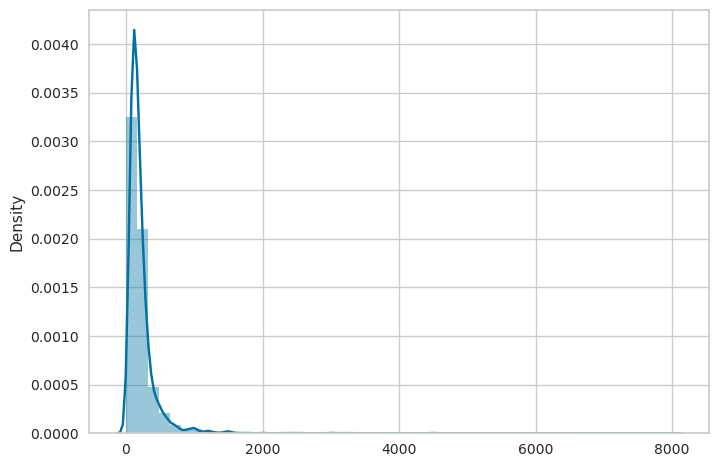

In [55]:
sns.distplot(x=mergeDf["price"])

In [56]:
mergeDf.describe()

,host_listings_count,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Earth house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Hut,property_type_In-law,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
count,7575.000000,7575.00000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7.575000e+03,7.575000e+03,7.575000e+03,7.575000e+03,7.575000e+03,7.575000e+03,7.575000e+03,7.575000e+03,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.00000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000
mean,68.810957,0.57769,37.765838,-122.430278,0.820594,3.213993,1.348353,1.352172,1.784752,215.201452,373.780330,108.308012,1.735842,16.987591,1.321773e+04,1.374270e+04,1.321756e+04,1.324513e+04,1.371885e+04,1.374566e+04,1.322917e+04,1.373017e+04,6.470495,16.374389,29.202772,146.523828,44.269175,14.376370,95.637463,9.776268,9.631152,9.862921,9.840954,9.679430,9.419194,0.990891,0.392739,0.044224,0.057690,20.716436,17.181782,3.003564,0.531089,1.876966,0.003696,0.40198,0.004884,0.000264,0.030627,0.002376,0.000264,0.000132,0.105083,0.001188,0.000264,0.069835,0.006205,0.012145,0.020462,0.284224,0.000132,0.000132,0.011485,0.003828,0.002376,0.016898,0.000132,0.000132,0.000264,0.019274,0.000132,0.001584,0.606601,0.363432,0.029967,0.001452,0.000792,0.003960,0.003036,0.990759
std,235.171339,0.49396,0.022747,0.026779,0.383717,1.928827,0.810604,0.936860,1.183928,256.334279,699.216772,79.187317,1.361821,30.781029,1.148970e+06,1.148964e+06,1.148970e+06,1.148970e+06,1.148965e+06,1.148964e+06,1.148970e+06,1.148965e+06,8.981623,19.219420,29.176861,125.305320,74.789057,22.516496,6.236847,0.607579,0.684907,0.472876,0.522698,0.622611,0.712858,0.095011,0.488392,0.205607,0.233171,51.741641,50.247190,7.185193,2.977967,1.826831,0.060689,0.49033,0.069723,0.016248,0.172316,0.048692,0.016248,0.011490,0.306680,0.034451,0.016248,0

In [57]:
for i in mergeDf.columns[1:-1]:

    q1=mergeDf[i].quantile(0.25)
    q3=mergeDf[i].quantile(0.75)

    iqr=q3-q1

    minimum=q1-(1.5*iqr)

    maximum=q3+(1.5*iqr)

    

    print("""
    Column Name: {0}
    Min Değer: {1}
    Max Değer: {2}
             
    """.format(i,minimum,maximum))


    
    
#her kolonun alt ve üst çeyrekliğini bulduk.


    Column Name: host_identity_verified
    Min Değer: -1.5
    Max Değer: 2.5
             
    

    Column Name: latitude
    Min Değer: 37.69958749999999
    Max Değer: 37.8368875
             
    

    Column Name: longitude
    Min Değer: -122.49094
    Max Değer: -122.36285999999998
             
    

    Column Name: is_location_exact
    Min Değer: 1.0
    Max Değer: 1.0
             
    

    Column Name: accommodates
    Min Değer: -1.0
    Max Değer: 7.0
             
    

    Column Name: bathrooms
    Min Değer: 0.25
    Max Değer: 2.25
             
    

    Column Name: bedrooms
    Min Değer: -0.5
    Max Değer: 3.5
             
    

    Column Name: beds
    Min Değer: -0.5
    Max Değer: 3.5
             
    

    Column Name: price
    Min Değer: -122.0
    Max Değer: 470.0
             
    

    Column Name: security_deposit
    Min Değer: -750.0
    Max Değer: 1250.0
             
    

    Column Name: cleaning_fee
    Min Değer: -85.0
    Max Değer: 27

In [58]:
veri=mergeDf.copy()


#def remove_outliers(data):
for i in mergeDf.columns[1:-1]:

        q1=mergeDf[i].quantile(0.25)
        q3=mergeDf[i].quantile(0.75)

        iqr=q3-q1

        minimum=q1-(1.5*iqr)

        maximum=q3+(1.5*iqr)

           

        #filteredData=[x for x in data if (x > maximum) & (x < minimum)]
        
        #return filteredData


In [59]:
for i in veri.columns[1:-1]:

        q1=veri[i].quantile(0.25)
        q3=veri[i].quantile(0.75)

        iqr=q3-q1

        minimum=q1-(1.5*iqr)

        maximum=q3+(1.5*iqr)

        #outlier_values = veri[(veri[i] < minimum) | (veri[i] > maximum)].index


        #print(f"{i}'nin Outlier Değerlerinin İndexleri: {outlier_values}")
        
        #print(outlier_values)



        #veri.drop(index=outlier_values,inplace=True)

In [60]:
veri

,host_listings_count,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Earth house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Hut,property_type_In-law,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,1,1,37.76931,-122.43386,1,3,1.0,1.0,2.0,170.0,100.0,100.000000,2,25.0,1,30,1,1,30,30,1.0,30.0,1,3,7,92,192,56,97.000000,10.000000,10.000000,10.000000,10.000000,10.00000,9.000000,1,1,0,0,1,1,0,0,1.600000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,37.74511,-122.42102,1,5,1.0,2.0,3.0,235.0,0.0,100.000000,2,0.0,30,60,30,30,60,60,30.0,60.0,0,0,0,0,111,0,98.000000,10.000000,10.000000,10.000000,10.000000,10.00000,9.000000,1,0,0,0,1,1,0,0,0.900000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10,1,37.76669,-122.45250,1,2,4.0,1.0,1.0,65.0,200.0,50.000000,1,12.0,32,60,32,32,60,60,32.0,60.0,30,60,90,365,17,0,85.000000,8.000000,8.000000,9.000000,9.000000,9.00000,8.000000,1,0,0,0,9,0,9,0,0.140000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10,1,37.76487,-122.45183,1,2,4.0,1.0,1.0,65.0,200.0,50.000000,1,12.0,32,90,32,32,90,90,32.0,90.0,11,41,71,346,8,1,93.000000,9.000000,9.000000,10.000000,10.000000,9.00000,9.000000,1,0,0,0,9,0,9,0,0.140000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,1,37.77525,-122.43637,1,5,1.5,2.0,2.0,685.0,0.0,225.000000,2,150.0,4,1125,4,4,1125,1125,4.0,1125.0,30,60,90,90,27,1,97.000000,10.000000,10.000000,10.000000,10.000000,10.00000,9.000000,1,0,1,1,2,2,0,0,0.230000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7570,2,0,37.75227,-122.42785,0,2,1.0,2.0,2.0,475.0,0.0,108.308012,1,0.0,3,1125,3,4,1125,1125,3.2,1125.0,26,56,86,86,0,0,95.637463,9.776268,9.631152,9.862921,9.840954,9.67943,9.419194,1,0,0,0,1,1,0,0,1.876966,0.0,0.0,0

In [61]:
#filteredData=remove_outliers(veri)



In [62]:
"""
for column in mergeDf.columns[1:-1]:
    for price in mergeDf["price"].unique():
        selected_price=mergeDf[mergeDf["price"]==price]
        selected_column=selected_price[column]

        q1=selected_column.quantile(0.25)
        q3=selected_column.quantile(0.75)

        iqr=q3-q1

        minimum=q1-(1.5*iqr)

        maximum=q3+(1.5*iqr)


        mergeDf.drop()


        print(column,price,maximum,minimum)

"""


'\nfor column in mergeDf.columns[1:-1]:\n    for price in mergeDf["price"].unique():\n        selected_price=mergeDf[mergeDf["price"]==price]\n        selected_column=selected_price[column]\n\n        q1=selected_column.quantile(0.25)\n        q3=selected_column.quantile(0.75)\n\n        iqr=q3-q1\n\n        minimum=q1-(1.5*iqr)\n\n        maximum=q3+(1.5*iqr)\n\n\n        mergeDf.drop()\n\n\n        print(column,price,maximum,minimum)\n\n'

In [63]:
mergeDf.corr()["price"].sort_values(ascending=False)

price                                           1.000000
accommodates                                    0.424783
bedrooms                                        0.408519
beds                                            0.353176
cleaning_fee                                    0.281549
guests_included                                 0.278125
room_type_Entire home/apt                       0.240564
security_deposit                                0.200977
bathrooms                                       0.200075
latitude                                        0.118815
availability_30                                 0.107771
extra_people                                    0.105144
availability_60                                 0.100356
review_scores_cleanliness                       0.095278
review_scores_rating                            0.093275
review_scores_location                          0.075098
property_type_Condominium                       0.073152
availability_90                

In [64]:
korelasyon=abs(mergeDf.corr()["price"]).sort_values(ascending=False).head(10)
korelasyon.index

Index(['price', 'accommodates', 'bedrooms', 'beds', 'cleaning_fee',
       'guests_included', 'room_type_Entire home/apt',
       'room_type_Private room', 'security_deposit', 'bathrooms'],
      dtype='object')

<AxesSubplot:>

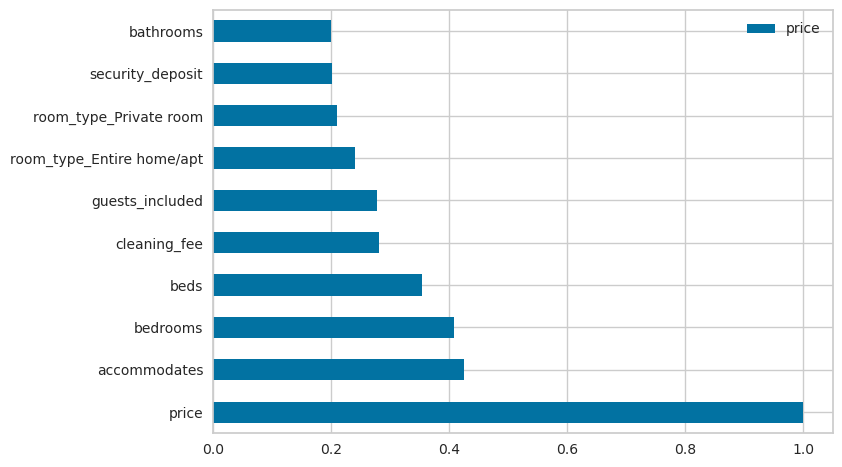

In [65]:
korelasyon=pd.DataFrame(korelasyon)

korelasyon.plot(kind="barh")

# Model Kurma ve Sonuçlar

In [66]:
msk= np.random.rand(len(mergeDf)) < 0.75
train= mergeDf[msk]
test=mergeDf[~msk]

In [67]:
X=mergeDf[[ 'accommodates', 'bedrooms', 'beds', 'cleaning_fee',
       'guests_included', 'room_type_Entire home/apt',
       'room_type_Private room', 'security_deposit', 'bathrooms']]

y=mergeDf["price"]

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42,shuffle=True)


print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (5075, 9)
X_test: (2500, 9)
y_train: (5075,)
y_test: (2500,)


In [69]:
xgbModel=xgb.XGBRegressor(n_estimators=500,early_stopping_rounds=30,learning_rate=0.04).fit(X_train,y_train, eval_set=[(X_train,y_train),(X_test,y_test)],verbose=100)

[0]	validation_0-rmse:337.10994	validation_1-rmse:304.07691
[100]	validation_0-rmse:190.48841	validation_1-rmse:197.25909
[200]	validation_0-rmse:181.22860	validation_1-rmse:195.87755
[291]	validation_0-rmse:176.14073	validation_1-rmse:195.42925


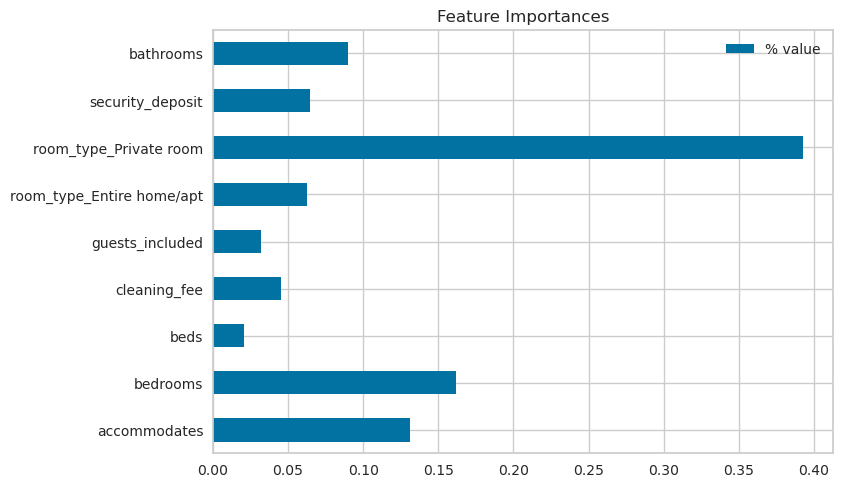

In [70]:
fi=pd.DataFrame(data=xgbModel.feature_importances_,index=xgbModel.feature_names_in_).plot(kind="barh",title="Feature Importances")
plt.legend(["% value"])
plt.show()




In [71]:
y_pred=xgbModel.predict(X_test)
a=pd.DataFrame(y_pred)
b=pd.DataFrame(y_test)

In [72]:
a.head()

,0
0,311.404968
1,89.755142
2,202.487885
3,127.785530
4,169.731216


In [73]:
b.head()

,price
7025,350.0
3721,85.0
4034,265.0
4113,125.0
2272,295.0


In [74]:
r2_score(y_test,y_pred)

0.2996167625055859

In [75]:
rfModel=RandomForestRegressor(n_estimators=100,n_jobs=-1).fit(X_train,y_train)

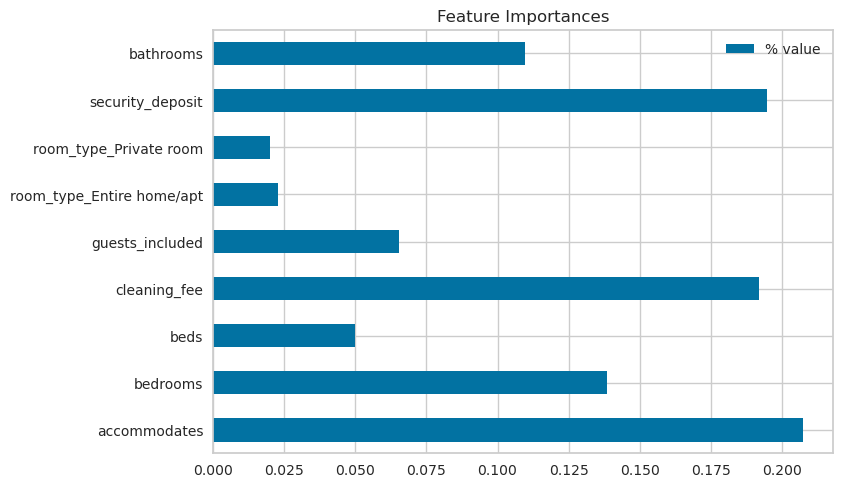

In [76]:
fi=pd.DataFrame(data=rfModel.feature_importances_,index=xgbModel.feature_names_in_).plot(kind="barh",title="Feature Importances")
plt.legend(["% value"])
plt.show()


In [77]:
y_pred=rfModel.predict(X_test)
a=pd.DataFrame(y_pred)
b=pd.DataFrame(y_test)


In [78]:
a.head()

,0
0,288.930000
1,55.957000
2,228.487197
3,115.272667
4,130.906250


In [79]:
b.head()

,price
7025,350.0
3721,85.0
4034,265.0
4113,125.0
2272,295.0


In [80]:
score=r2_score(b,a)
score

0.16020688663629712

In [81]:
np.sqrt(mean_squared_error(b,a))

213.7122172456077

In [82]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.1571714898410066

In [83]:
catboostModel=cb.CatBoostRegressor(n_estimators=2000,learning_rate=0.044).fit(X_train,y_train)

0:	learn: 264.3855583	total: 58.3ms	remaining: 1m 56s
1:	learn: 262.1775003	total: 59.9ms	remaining: 59.9s
2:	learn: 260.1377347	total: 61.5ms	remaining: 41s
3:	learn: 258.0554990	total: 62.9ms	remaining: 31.4s
4:	learn: 256.2254769	total: 64.3ms	remaining: 25.7s
5:	learn: 254.6979348	total: 65.7ms	remaining: 21.8s
6:	learn: 253.3238900	total: 67.1ms	remaining: 19.1s
7:	learn: 251.7578496	total: 68.5ms	remaining: 17s
8:	learn: 250.4883208	total: 69.6ms	remaining: 15.4s
9:	learn: 249.2252809	total: 70.8ms	remaining: 14.1s
10:	learn: 247.8572531	total: 72.1ms	remaining: 13s
11:	learn: 246.7497905	total: 73.3ms	remaining: 12.1s
12:	learn: 245.4252398	total: 74.6ms	remaining: 11.4s
13:	learn: 244.2842183	total: 75.8ms	remaining: 10.8s
14:	learn: 243.3190909	total: 77ms	remaining: 10.2s
15:	learn: 242.4111649	total: 78.3ms	remaining: 9.71s
16:	learn: 241.5772184	total: 79.5ms	remaining: 9.27s
17:	learn: 240.7395801	total: 80.8ms	remaining: 8.89s
18:	learn: 240.0059736	total: 82ms	remaining:

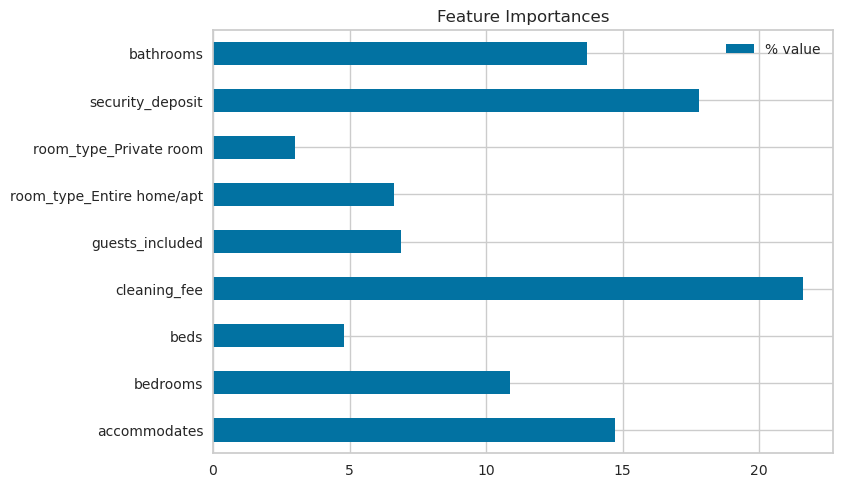

In [84]:
fi=pd.DataFrame(data=catboostModel.feature_importances_,index=xgbModel.feature_names_in_).plot(kind="barh",title="Feature Importances")
plt.legend(["% value"])
plt.show()

In [85]:
y_pred=catboostModel.predict(X_test)
a=pd.DataFrame(y_pred)
b=pd.DataFrame(y_test)


In [86]:
r2_score(b,a)

0.3124501340958685

In [87]:
reg1 = setup(data = train, 
             target = "price",
             remove_outliers = True,
             feature_selection = True)

,Description,Value
0,Session id,6593
1,Target,price
2,Target type,Regression
3,Original data shape,"(5598, 80)"
4,Transformed data shape,"(5402, 16)"
5,Transformed train set shape,"(3722, 16)"
6,Transformed test set shape,"(1680, 16)"
7,Numeric features,79
8,Preprocess,True
9,Imputation type,simple


In [88]:
best = reg1.compare_models(include=["lightgbm","catboost","gbr","rf","xgboost","knn"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,76.7245,36123.9779,177.5007,0.4124,0.4873,0.4359,2.6980
catboost,CatBoost Regressor,72.0387,37100.3924,180.9755,0.3822,0.4529,0.4120,2.3130
rf,Random Forest Regressor,75.5307,40140.5248,189.0724,0.3240,0.4637,0.4301,3.1050
gbr,Gradient Boosting Regressor,78.3166,39804.9671,188.9988,0.3174,0.4819,0.4572,1.1140
xgboost,Extreme Gradient Boosting,77.8883,42113.0211,195.9893,0.2478,0.4880,0.4414,1.1310
knn,K Neighbors Regressor,98.7096,48237.7213,210.0318,0.1664,0.5850,0.5510,0.2050


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [89]:
lgbm=create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,71.6178,19611.3129,140.0404,0.3538,0.5009,0.4418
1,64.2444,12301.1204,110.9104,0.6072,0.4362,0.3789
2,82.6024,25751.5175,160.4728,0.4381,0.4820,0.4587
3,74.5778,19017.8533,137.9052,0.4873,0.4458,0.3960
4,73.8588,70127.0400,264.8151,0.1768,0.5352,0.4673
5,89.1425,89753.7012,299.5892,0.1591,0.5025,0.3789
6,67.9186,14090.3183,118.7026,0.4316,0.4925,0.4885
7,63.6728,11994.3312,109.5186,0.6614,0.4244,0.3759
8,89.9108,70567.1976,265.6449,0.2700,0.5158,0.4795


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [90]:
tune_model=tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,70.5275,17517.2905,132.3529,0.4228,0.4667,0.4498
1,70.2777,12532.9948,111.9509,0.5998,0.4445,0.4137
2,79.1373,24614.8542,156.8912,0.4629,0.4715,0.4159
3,73.8001,16914.9781,130.0576,0.5440,0.4354,0.3920
4,78.8106,72032.9555,268.3896,0.1544,0.5250,0.5179
5,97.3149,92140.5266,303.5466,0.1368,0.5397,0.4676
6,71.7618,13057.0357,114.2674,0.4733,0.4981,0.5189
7,68.5881,13304.5646,115.3454,0.6244,0.4693,0.4373
8,93.4721,68175.4269,261.1042,0.2947,0.5596,0.5157


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.

In [91]:
pred_lgbm = predict_model(tune_model, data=test)
final_lgbm = finalize_model(tune_model)

pred_lgbm[["price","prediction_label"]]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,72.0605,17101.0933,130.7711,0.5067,0.4831,0.4476


,price,prediction_label
0,170.0,191.201198
8,265.0,359.699828
16,215.0,221.611040
18,107.0,136.859667
20,125.0,160.687857
...,...,...
7562,35.0,206.420171
7566,35.0,206.420171
7567,57.0,176.220092
7569,120.0,219.763963


In [92]:
r2_score(pred_lgbm["price"],pred_lgbm["prediction_label"])

0.5067298271075942